# <h1><center>Course: Introduction to Machine Learning</center></h1>
# <h1><center>Assigment 2</center></h1>
### <h1><center>Important NOTE: In order to get full credit, for every question, you need to provide the details of your work on how you arrived at your solution.</center></h1>
### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
### <h1><center>TA: Cole Nockolds</center></h1>
#### <h1><center>Due day: 11:00 pm, Monday, 30, September, 2024 </center></h1>
### If you use this jupyter notebook for the assignment, please convert to .pdf file for submission. For other options, all submission MUST be in pdf format, except codes.

## **Question 1** (Linear regression + regularization techniques + data augmentation) (60 points)

In this problem, we approximate the polynomial from noisy data points. To that end, we generate a data pair $(x^{(i)}, y^{(i)})$ from the following noise-corrupted relation  
$$
f(x^{(i)}) = 0.5 - {x^{(i)}} - 0.5 [{x^{(i)}}]^2 - 2 [{x^{(i)}}]^3 + 5 [{x^{(i)}}]^4
$$
$$ y^{(i)} = f(x^{(i)}) + \delta \varphi^{(i)} f(x^{(i)})$$
of the following  ground truth function
$$ y = 0.5 - {x} - 0.5 {x}^2 - 2 {x}^3 + 5 {x}^4$$

where $\delta = 0.05$ is the noise level, $\varphi^{(i)}$ is drawn from standard normal distribution (given in the pseudo-code). We need to generate 8 holdout samples and 7 training samples.

- (1.a) (+10) Fill the generating data code and produce figures to visualize data and true functions.
- (1.b) (+10) Perform the LinearRegression() using polynomial approximation of order of 1, 10 and 4. Visualizing each cases to see which case are overfitting, underfitting, and fitting well. Present the mean square error of the holdout data to support your observation.
- (1.c) (+10) For the overfitting senario, apply L2 regularization. You need to do: 
    + step 1: Plot the L2 regularization model, no regularization model, and the ground truth function in one plot to see how L2 impacts the fit (pick a reasonable $\lambda$).
    + step 2: Plot the mean square error of holdout data as a function of the regularization parameter $\lambda$ over the range $\lambda \in [10^{-5},10]$. What is the optimal $\lambda$ approximately? 
    + step 3: Using L-curved technique (read [https://www.sintef.no/globalassets/project/evitameeting/2005/lcurve.pdf]) to find out the optimal $\lambda$. The L-curved line is the one represents the relationship between residual norm $||y - f(x,\boldsymbol{\theta})||_2$ and solution norm $||\boldsymbol{\theta}||_2$. Plot the L-curve and compare the optimal values of $\lambda$ from step 2 and step 3?
- (1.d) (+10) For the overfitting senario, apply L1 regularization. Repeat the all 3 steps in the question (1.c).
- (1.e) (+10) For the overfitting senario, apply Elasticnet regularization (a mixture of L1 and L2), i.e., the loss function with Elasticnet regularization is 
$$ J(\boldsymbol{\theta}) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \boldsymbol{\theta}^\top \boldsymbol{\Phi}(x^{(i)})) + \lambda \cdot ||\boldsymbol{\theta}||_1 + \frac{1}{2} \gamma ||\boldsymbol{\theta}||_2^2$$

We are interested in the performance of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. One way to visualize this is to plot the contour of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. Plot the contour and discuss the relationship between Elasticnet and L2, L1 regularization?

- (1.g) (+10) **Can we do something else** and yet achieve the same regularization effect? One way to accomplish this is via **data augmentation techniques**. The data augmentation technique that we will attempt consists of 4 steps:
    + step 1: Clone 7 training data samples (X in the code) into 350 samples (using numpy.repeat). (Note: this is noise-free data).
    + step 2: We add noise to these 350 samples by $$\tilde{x}^i = x^i + \delta \varphi^i,$$ where $\varphi^i$ is drawn from standard normal distribution. This is our augmented data, called X_data_augmented.
    + step 3: Similarly, clone the 7 training labels data, corresponding to the cloned X data, into 350 samples (using numpy.repeat), denoted y_data_augmented. 
    + step 4: Now, we have (X_data_augmented, y_data_augmented) pairs. Use LinearRegression to train the model from these augmented data pairs.

    You need to (1) generate augmented data, (2) Determine a good noise level $\delta$ by trying different values of $\delta$? Explain why too much or too small noise is not good? To answer the last question, you may need to read the folllowing references
    1. Train Neural Networks With Noise to Reduce Overfitting, [https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/]
    2. [https://arxiv.org/abs/2208.04995]

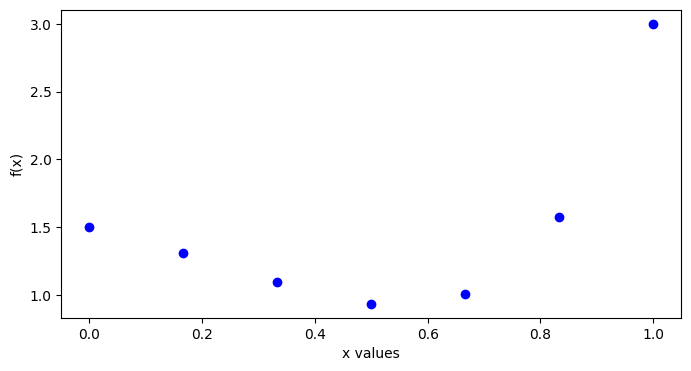

In [33]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets
np.random.seed(0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression

## please keep the below codes for generating x, DO NOT CHANGE!

order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])

def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f

# ==========================================================================================
# holdout samples
n_holdout_samples = 8
phi_i_holdout = np.sort(np.random.rand(n_holdout_samples)) 

# Training samples
n_samples = 7
phi_i_train = np.sort(np.random.rand(n_samples)) 
# ==========================================================================================

# [CONTINUE YOUR WORK FROM HERE!]

# 1a
from matplotlib import pyplot as plt
X_train = np.linspace(0,1,7) * np.linspace(0,1,7)
X_holdout = np.linspace(0,1,8) * np.linspace(0,1,8)

plt.clf()
plt.plot(X_train, true_fn(X_train),"bo", label = "True Function")
plt.xlabel("x values")
plt.ylabel("f(x)")
plt.savefig("1a_true.png")


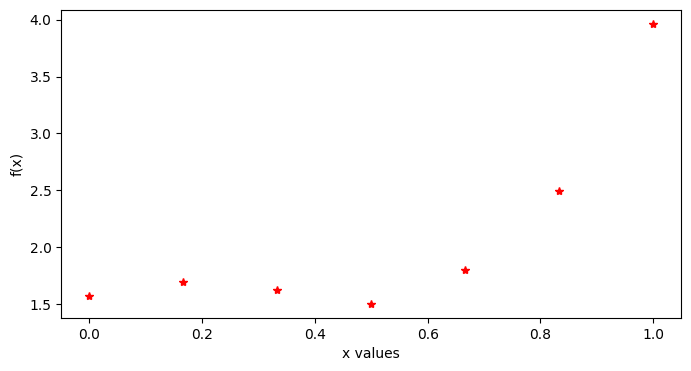

In [34]:
plt.clf()
plt.plot(X_train,true_fn(X_train)+phi_i_train, "r*", label = "Noisy Data" )
plt.xlabel("x values")
plt.ylabel("f(x)")
plt.savefig("1a_noisy.png")
plt.show()

In [35]:
from sklearn import linear_model


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,true_fn(X_train)+phi_i_train)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(X_holdout)

ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## **Question 2** (Probability + random variables) (10 points)

Consider $\Omega = [-2, 2]$ and define 
$$P[B \subset \Omega] := \int_{B} \frac{1}{4} d \omega, \text{ and thus }
P[d\omega] := \frac{1}{4} d \omega,
$$
that is the elementary event $\omega$ is the uniform random variable on $\Omega$.
Now, define $M(\omega)$ as: 
\begin{align}
    &M(\omega) =
    \begin{cases} 
        2 & \text{ if } \omega \geq 0\\
        0 & \text{ else }
    \end{cases}
\end{align}
$ \implies \text{ the state space is given by } S = \left\{ 0, 2 \right\}$. What is $E[M]$? What are $ \mu_M [M( \omega )=2]$ and $ \mu_M [M( \omega )=0]$?


## **Question 3** (Optimality Condition) (15 points)

Let $f$: $R^n$ $\to$ $R$. In class, we proved the first necessary condition for optimality $\nabla f(\boldsymbol{x}^*) = 0$ at a minimizer $\boldsymbol{x}^*$ using the first necessary condition from the scalar optimization case. Prove the second necessary optimality condition for $f$ at $\boldsymbol{x}^*$. In particular, show that the Hessian of $f$ at $\boldsymbol{x}^*$ is a semi-positive definite matrix.


## **Question 4** (Conditional Probability) (15 points)

Let the triplet $\Omega$, $\mathcal{F}$, $\mathbb{P}$ be a probability space. Let $B$ be an event in $\mathcal{F}$. Show that the conditional probability $\mathbb{P}[A | B]$ is a proper probability measure. That is, you need to show the following conditions
1. $\mathbb{P}[\emptyset | B] = 0$
2.  $\mathbb{P}[\Omega | B] = 1$
3.  $0\le \mathbb{P}[ A| B] \le 1$, for all $A \in \mathcal{F}$
4. Let $A_i \in \mathcal{F}, i = 1,\dots,n$ be mutually disjoint. Show that $\mathbb{P}[\cup_{i=1}^n A_i | B] = \sum_{i=1}^n \mathbb{P}[A_i | B] $